<a href="https://colab.research.google.com/github/LaylaMcD/DIGS-DP/blob/main/Sample_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from nltk.sentiment.vader import SentimentIntensityAnalyzer
##from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Other visualization
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [25]:
csv_file = "/content/drive/My Drive/Colab Notebooks/falcon_train.csv"
sampl_1 = pd.read_csv(csv_file, usecols=[1,2,6])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [29]:
##train_df = sampl_1.sample(10000)
csv_file = "/content/drive/My Drive/Colab Notebooks/sampl_1_train.csv"

In [27]:
train_df.to_csv('/content/drive/My Drive/Colab Notebooks/sampl_1_train.csv')

In [31]:
train_df = pd.read_csv(csv_file)
train_df.describe()

,Unnamed: 0.1,Unnamed: 0,polarity,subjectivity,neg,pos,neu,compound
count,10000.00000,10000.000000,10000.000000,10000.000000,323.000000,323.000000,323.000000,323.000000
mean,4999.50000,87186.308100,0.151150,0.445516,0.004700,0.004700,0.987508,-0.002400
std,2886.89568,50755.505353,0.137966,0.138235,0.019662,0.019662,0.067705,0.074304
min,0.00000,12.000000,-0.700000,0.000000,0.000000,0.000000,0.000000,-0.706300
25%,2499.75000,43056.000000,0.067494,0.376278,0.000000,0.000000,1.000000,0.000000
50%,4999.50000,87303.500000,0.141056,0.456089,0.000000,0.000000,1.000000,0.000000
75%,7499.25000,130914.500000,0.224375,0.525000,0.000000,0.000000,1.000000,0.000000
max,9999.00000,174918.000000,1.000000,1.000000,0.135000,0.135000,1.000000,0.458800


In [32]:
train_df.head(5)

,Unnamed: 0.1,Unnamed: 0,content,url,image_urls,polarity,subjectivity,sentiment,neg,pos,neu,compound
0,0,9108,RIT students make finals of enterprise-plannin...,http://www.rit.edu/news/story.php?id=46897,[],0.043636,0.385455,positive,NaN,NaN,NaN,NaN
1,1,101184,Ticket2RideBC co-sponsors the 2007 Chain React...,http://dirtmountainbike.com/news/for-immediate...,[array(['http://cdn1.coresites.mpora.com/dirt_...,0.480417,0.453750,positive,NaN,NaN,NaN,NaN
2,2,9375,Auden was writing his poems during a time when...,http://www.shmoop.com/funeral-blues/calling-ca...,[],0.170833,0.543229,positive,NaN,NaN,NaN,NaN
3,3,41778,The Lodge On The Desert is committed to furthe...,https://www.lodgeonthedesert.com/en-us/website...,[],0.223333,0.514444,positive,NaN,NaN,NaN,NaN
4,4,144140,All you have to do is nail the shingles or rol...,http://ewec.snruic.snru.ac.th/ioaoz/article.ph...,[],0.158078,0.498598,positive,NaN,NaN,NaN,NaN


In [13]:
import nltk
##import ssl

##try:
    ##_create_unverified_https_context = ssl._create_unverified_context
##except AttributeError:
    ##pass
##else:
    ##ssl._create_default_https_context = _create_unverified_https_context

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [15]:
import re
from textblob import TextBlob
import string

In [16]:
text_series_list = [train_df[col].astype(str) for col in train_df.columns]

# Join each text Series into a single string
text_strings = [' '.join(text_series) for text_series in text_series_list]

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   content     10000 non-null  object
 2   url         10000 non-null  object
 3   image_urls  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [17]:
train_df['content'] = train_df['content'].astype(str)

In [18]:
train_df['content'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: content
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [19]:
train_df[['polarity','subjectivity']] = train_df['content'].apply(lambda Text : pd.Series(TextBlob(Text).sentiment))

In [20]:
train_df.head(4)

,Unnamed: 0,content,url,image_urls,polarity,subjectivity
0,9108,RIT students make finals of enterprise-plannin...,http://www.rit.edu/news/story.php?id=46897,[],0.043636,0.385455
1,101184,Ticket2RideBC co-sponsors the 2007 Chain React...,http://dirtmountainbike.com/news/for-immediate...,[array(['http://cdn1.coresites.mpora.com/dirt_...,0.480417,0.453750
2,9375,Auden was writing his poems during a time when...,http://www.shmoop.com/funeral-blues/calling-ca...,[],0.170833,0.543229
3,41778,The Lodge On The Desert is committed to furthe...,https://www.lodgeonthedesert.com/en-us/website...,[],0.223333,0.514444


How do we define polarity? Subjectivity? What do these values mean? How might these relate to human emotion?

In [33]:
# Computing a score for the text column using SentimentIntensityAnalyzer
# If you have a "lexicon error", try the following
nltk.download('vader_lexicon')
for index,row in train_df['content'].items():
    # compute a score
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    # Assign score categories to variables
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    # If negative score (neg) is greater than positive score (pos), then the text should be categorized as "negative"
    if neg> pos:
        train_df.loc[index,"sentiment"] = 'negative'
    # If positive score (pos) is greater than the negative score (neg), then the text should be categorized as "positive"
    elif pos > neg:
        train_df.loc[index,"sentiment"] = "positive"
    # Otherwise
    else:
        train_df.loc[index,"sentiment"] = "neutral"
        train_df.loc[index,'neg'] = neg
        train_df.loc[index,'pos'] = pos
        train_df.loc[index,'neu'] = neu
        train_df.loc[index,'compound'] = comp

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
train_df.head()

,Unnamed: 0.1,Unnamed: 0,content,url,image_urls,polarity,subjectivity,sentiment,neg,pos,neu,compound
0,0,9108,RIT students make finals of enterprise-plannin...,http://www.rit.edu/news/story.php?id=46897,[],0.043636,0.385455,positive,NaN,NaN,NaN,NaN
1,1,101184,Ticket2RideBC co-sponsors the 2007 Chain React...,http://dirtmountainbike.com/news/for-immediate...,[array(['http://cdn1.coresites.mpora.com/dirt_...,0.480417,0.453750,positive,NaN,NaN,NaN,NaN
2,2,9375,Auden was writing his poems during a time when...,http://www.shmoop.com/funeral-blues/calling-ca...,[],0.170833,0.543229,positive,NaN,NaN,NaN,NaN
3,3,41778,The Lodge On The Desert is committed to furthe...,https://www.lodgeonthedesert.com/en-us/website...,[],0.223333,0.514444,positive,NaN,NaN,NaN,NaN
4,4,144140,All you have to do is nail the shingles or rol...,http://ewec.snruic.snru.ac.th/ioaoz/article.ph...,[],0.158078,0.498598,positive,NaN,NaN,NaN,NaN


In [103]:
# Let's take a look at how many are labelled positive, negative or neutral
train_df_negative = train_df[train_df['sentiment']=='negative']
train_df_positive = train_df[train_df['sentiment']=='positive']
train_df_neutral = train_df[train_df['sentiment']=='neutral']

# Let's count how many of these values belong to each category. We will define a function to count values.
def count_values_in_column(data,feature):

    total = data.loc[:,feature].value_counts(dropna=False)
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)

    return pd.concat([total,percentage],axis=1, keys=['Total', 'Percentage'])

# Values for sentiment
pc = count_values_in_column(train_df, "sentiment")

pc

,Total,Percentage
positive,8209,82.09
negative,1468,14.68
neutral,323,3.23


from matplotlib import pyplot as plt
pc['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pc['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pc.plot(kind='scatter', x='Total', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pc['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pc['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

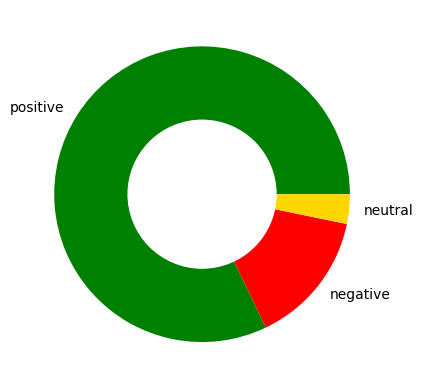

In [105]:
# piechart
names = pc.index
size = pc['Percentage']
my_circle = plt.Circle((0,0), 0.5, color='white')
plt.pie(size, labels=names,colors=['green','red','gold'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
train_df['punct'] = train_df['content'].apply(lambda x: remove_punct(x))

In [41]:
#Applying tokenization- splitting a phrase, sentence, paragraph, or an entire text document into smaller units
def tokenization(text):
    text = re.split('\W+', text)
    return text
train_df['tokenized'] = train_df['punct'].apply(lambda x: tokenization(x.lower()))

In [42]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
train_df['nonstop'] = train_df['tokenized'].apply(lambda x: remove_stopwords(x))

In [43]:
#Applying Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
train_df['stemmed'] = train_df['nonstop'].apply(lambda x: stemming(x))

In [44]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [52]:
countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(train_df['content'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())

10000 Number of reviews has 112356 words


In [53]:
count = pd.DataFrame(count_vect_df.sum(),columns=["Value"])
countdf = count.sort_values("Value",ascending=False).head(20)

px.bar(countdf[1:],x=countdf.index[1:],y="Value"
##labels={
                     ##countdf: "Sepal Length (cm)",
                     ##"Value": "Sepal Width (cm)"
                 ##},
                ##title="Manually Specified Labels"
       )

In [62]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


sampl_negative = train_df[train_df['sentiment']=='negative']
sampl_positive = train_df[train_df['sentiment']=='positive']
sampl_neutral = train_df[train_df['sentiment']=='neutral']


In [70]:
def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/cloud-Copy1.jpeg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


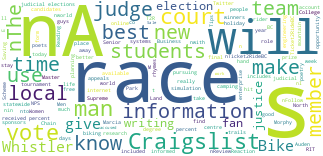

In [71]:
create_wordcloud(train_df["content"].values)

Craigslist! But also Race. We can also see nA. Let's see if we can remove it

In [100]:
remove_pb = lambda x: re.sub("na","",x)

train_df['content'] = train_df['content'].map(remove_pb)

In [101]:
def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/cloud-Copy1.jpeg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_two.png")
    print("Word Cloud Saved Successfully")
    path="wc_two.png"
    display(Image.open(path))

Word Cloud Saved Successfully


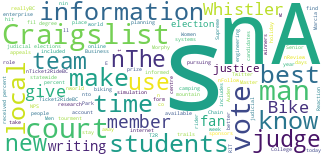

In [102]:
create_wordcloud(train_df["content"].values)

Why won't nA go away? Was able to remove "will" and "race" but not nA